# Simple Linear Reagression

## Read the datasets

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
a = pd.read_csv('50_Startups.csv')
a.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
a.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
a.duplicated().sum()

0

## Seperate x and Y 
## PROFIT ~ RND

## PROFIT_pred = B0 + B1XRND

<Axes: xlabel='RND', ylabel='PROFIT'>

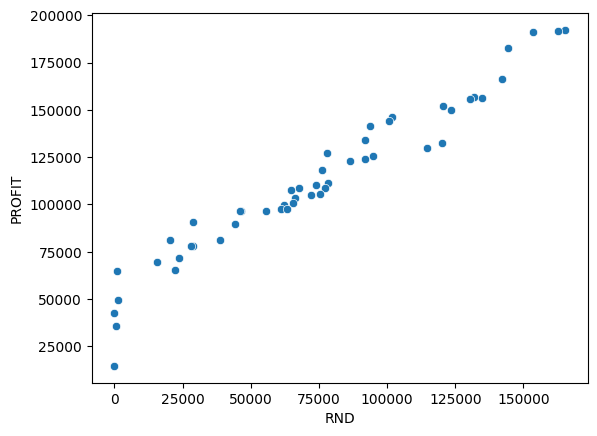

In [6]:
import seaborn as sns
sns.scatterplot(data=a, x='RND', y='PROFIT')

In [7]:
x= a[['RND']]
y= a[['PROFIT']]

In [8]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [9]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [11]:
model.coef_

array([[0.85429137]])

In [12]:
model.intercept_

array([49032.89914125])

## PROFIT_pred = 49032.89 +0.85429137*RND

<Axes: xlabel='RND', ylabel='PROFIT'>

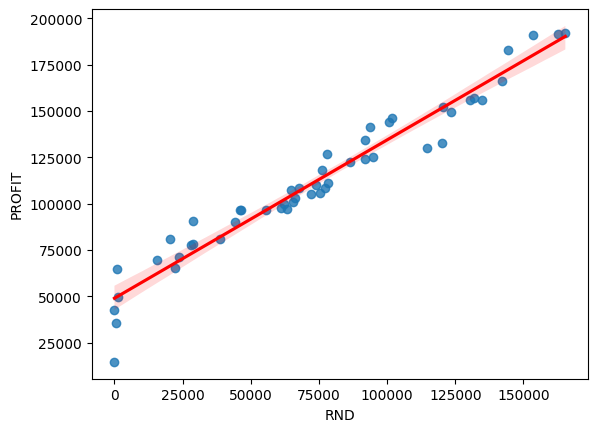

In [13]:
sns.regplot(data=a, x='RND',y='PROFIT',line_kws={'color':'red'})

In [14]:
rnd = [[80000]]
profit_predict= model.predict(rnd)
profit_predict

array([[117376.20881636]])

In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [16]:
ypred = model.predict(x)

In [17]:
mse = mean_squared_error(y,ypred)
mse

85120931.32706906

In [18]:
rmse = mse**(1/2)

In [19]:
rmse

9226.100548285232

In [20]:
mae = mean_absolute_error(y,ypred)
mae

6910.98435457961

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y,ypred)
mape

0.11070141081984847

In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y,ypred)
r2

0.9465353160804393

## Muiltiple Linear Regression

In [23]:
b = pd.read_csv('50_Startups.csv')
b.head()


,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [24]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [25]:
b.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [26]:
b.duplicated().sum()

0

## Seperate X AND Y

In [27]:
X = b[['RND','ADMIN','MKT']]
Y = b[['PROFIT']]

In [28]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [29]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [31]:
## B0 value
model.intercept_


array([50122.19298987])

In [32]:
## B1 value
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [33]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

## PROFIT_predict = 50122.1929 + 0.80571505*RND - 0.02681597*ADMIN + 0.02722806*MKT

In [34]:
coef = pd.Series(model.coef_.flatten())
coef.index = X.columns
coef


RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

In [35]:
X_new = [[100000,50000,60000]]
model.predict(X_new)


array([[130986.58344975]])

<Axes: title={'center': 'prediction'}>

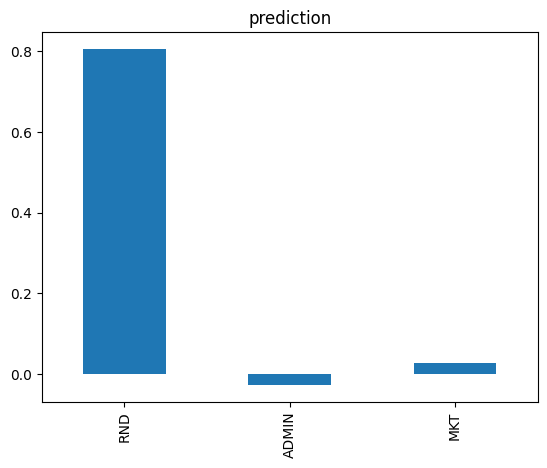

In [36]:
coef.plot(kind='bar',title='prediction')

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [38]:
Ypred= model.predict(X)

In [39]:
mse = mean_squared_error(Y,Ypred)

In [40]:
mse

78417126.01913083

In [41]:
rmse = mse**(1/2)
rmse

8855.34448901514

In [42]:
mae = mean_absolute_error(Y,Ypred)
mae

6471.4503961048085

In [43]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y,Ypred)
mape

0.10601209160494125

In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Ypred)

In [45]:
r2

0.9507459940683246

In [46]:
X_new = [[100000,50000,30000]]
model.predict(X_new)

array([[130169.74150573]])

In [47]:
X_new = [[100000,30000,30000]]
model.predict(X_new)

array([[130706.06087362]])

In [48]:
X_new = [[150000,50000,30000]]
model.predict(X_new)

array([[170455.49400151]])

In [49]:
import pandas as pd
c = pd.read_csv("Cars93 (4).csv",na_values=['','NA'],keep_default_na=False)
c.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [50]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [51]:
s = c.isna().sum()
s

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [52]:
s[s>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [53]:
c.duplicated().sum()

0

In [54]:
c.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [55]:
c.dtypes

id                      int64
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

In [56]:
cat = list(c.columns[c.dtypes=='object'])
con = list(c.columns[c.dtypes!='object'])

In [57]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [58]:
con

['id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [59]:
c['AirBags'].value_counts()

AirBags
Driver only           42
None                  33
Driver & Passenger    14
Name: count, dtype: int64

In [60]:
c['AirBags'].mode()[0]

'Driver only'

In [61]:
c['Rear.seat.room'].mean()

27.82967032967033

In [62]:
c['Luggage.room'].mean()

13.890243902439025

In [63]:
def replacer(c):
    cat = list(c.columns[c.dtypes=='object'])
    for i in c.columns:
        if i in cat:
            md  = c[i].mode()[0]
            c[i] = c[i].fillna(md)

        else:
            mn = c[i].mean()
            c[i] = c[i].fillna(mn)
print('Missing value replacer')
            

Missing value replacer


In [64]:
replacer(c)

In [65]:
c.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [66]:
c.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [67]:
c.to_csv('Cars93filled',index=False)

In [68]:
X = c.drop(columns=['id','Weight'])
Y = c[['Weight']]

In [69]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [70]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


In [71]:
X_cat = c.select_dtypes(include='object')
X_cat.head()

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,Acura,Integra,Small,None,Front,4,Yes,non-USA,Acura Integra
1,Acura,Legend,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Acura Legend
2,Audi,90,Compact,Driver only,Front,6,Yes,non-USA,Audi 90
3,Audi,100,Midsize,Driver only,Front,6,Yes,non-USA,Audi 100
4,BMW,535i,Midsize,Driver only,Rear,4,Yes,non-USA,BMW 535i


In [72]:
X_con = c.select_dtypes(exclude='object')
X_con

,id,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,1,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.000000,2705
1,2,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.000000,3560
2,3,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.000000,3375
3,4,30.8,37.7,44.6,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.000000,3405
4,5,23.7,30.0,36.2,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.000000,3640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,16.6,19.7,22.7,17,21,2.5,109,4500,2915,21.1,7,187,115,72,38,34.0,13.890244,3960
89,90,17.6,20.0,22.4,21,30,2.0,134,5800,2685,18.5,5,180,103,67,35,31.5,14.000000,2985
90,91,22.9,23.3,23.7,18,25,2.8,178,5800,2385,18.5,4,159,97,66,36,26.0,15.000000,2810
91,92,21.8,22.7,23.5,21,28,2.3,114,5400,2215,15.8,5,190,104,67,37,29.5,14.000000,2985


In [73]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')


In [74]:
X_cat_pre = ohe.fit_transform(X_cat)
X_cat_pre

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
from sklearn.preprocessing import StandardScaler
sacler = StandardScaler().set_output(transform='pandas')
X_con_pre = sacler.fit_transform(X_con)
X_con_pre

,id,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,-1.713526,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.452197,-1.033015,-0.627055
1,-1.676275,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.738090,0.396643,0.830208
2,-1.639025,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.057926,0.039228,0.514894
3,-1.601774,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.078172,1.111472,0.566026
4,-1.564523,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.282156,-0.318186,0.966560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1.564523,-0.060445,0.019810,0.073018,-0.959938,-1.524806,-0.162577,-0.668585,-1.315292,1.180155,1.359872,1.852158,0.261346,1.629649,0.698038,-0.298510,2.098419,0.000000,1.511968
89,1.601774,0.054512,0.051036,0.045673,-0.244313,0.172352,-0.647181,-0.188665,0.875050,0.714407,0.562740,-0.083243,-0.220626,-0.139503,-0.632239,-1.234288,1.248213,0.039228,-0.149822
90,1.639025,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,-1.050944,-1.666543,-1.024079,-0.898295,-0.922362,-0.622238,0.396643,-0.448092
91,1.676275,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,-0.083243,0.467905,0.007926,-0.632239,-0.610436,0.568049,0.039228,-0.149822


In [76]:
X_cat_pre.to_csv('ohe.csv',index=False)
X_con_pre.to_csv('Scaler.csv',index=False)

In [77]:
X_pre = X_cat_pre.join(X_con_pre) 

In [78]:
X_pre

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.452197,-1.033015,-0.627055
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.738090,0.396643,0.830208
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.057926,0.039228,0.514894
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.078172,1.111472,0.566026
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.282156,-0.318186,0.966560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.180155,1.359872,1.852158,0.261346,1.629649,0.698038,-0.298510,2.098419,0.000000,1.511968
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.714407,0.562740,-0.083243,-0.220626,-0.139503,-0.632239,-1.234288,1.248213,0.039228,-0.149822
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.106911,0.562740,-1.050944,-1.666543,-1.024079,-0.898295,-0.922362,-0.622238,0.396643,-0.448092
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.237337,-0.265051,-0.083243,0.467905,0.007926,-0.632239,-0.610436,0.568049,0.039228,-0.149822


In [79]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,random_state=21,test_size=0.2)

In [80]:
xtrain.head()

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.187910,-0.663618,-0.083243,-0.564892,0.155356,-0.632239,-1.546214,-0.622238,-0.675601,-0.260608
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.157535,-1.062184,-0.083243,-0.840305,-0.876650,-0.632239,-0.922362,0.057926,-0.675601,-0.925325
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.247462,0.716035,-0.083243,0.467905,0.450214,0.165927,1.261120,-0.112115,0.039228,1.119956
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.713210,0.409445,0.884457,1.294143,1.334791,1.230149,0.325342,0.738090,0.396643,0.710900
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.996708,1.022624,0.884457,2.464647,1.924508,2.028316,1.884972,1.248213,2.898544,1.673887


In [81]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [82]:
xtest.head()

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.532158,-0.816912,-0.083243,-0.771452,-1.024079,-0.632239,-0.298510,-0.452197,-0.318186,-0.686709
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.370159,0.961306,1.852158,0.261346,1.334791,0.431983,0.637268,2.438501,0.000000,1.213698
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.237337,-0.265051,-0.083243,0.467905,0.007926,-0.632239,-0.610436,0.568049,0.039228,-0.149822
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.108083,-0.203734,0.884457,1.362996,0.892502,-0.100128,1.573046,2.778583,1.111472,0.847252
17,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.988953,1.942392,0.884457,2.120381,1.777079,2.028316,0.949194,0.568049,2.183715,1.426748


In [83]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


In [84]:
xtrain.shape

(74, 259)

In [85]:
ytrain.shape

(74, 1)

In [86]:
xtest.shape

(19, 259)

In [87]:
ytest.shape

(19, 1)

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [89]:
model.score(xtrain,ytrain)

1.0

In [90]:
model.score(xtest,ytest)

0.9832450893459248

In [91]:
def evalute_model(model,x,y):
    ypre = model.predict(x)
    from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score
    from sklearn.metrics import mean_absolute_percentage_error
    mse = mean_squared_error(y,ypre)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y,ypre)
    mape = mean_absolute_percentage_error(y,ypre)
    r2 = r2_score(y,ypre)
    print(f'Mean Squared Error : {mse:.2f}')
    print(f'Root Mean Squared Error : {rmse:.2f}')
    print(f'Mean Absolute Error : {mae:.2f}')
    print(f'Mean Absolute Percentage Error : {mape:.4f}')
    print(f'R2 Score : {r2:.4f}')

In [92]:
evalute_model(model,xtrain,ytrain)

Mean Squared Error : 0.00
Root Mean Squared Error : 0.00
Mean Absolute Error : 0.00
Mean Absolute Percentage Error : 0.0000
R2 Score : 1.0000


In [93]:
evalute_model(model,xtest,ytest)

Mean Squared Error : 6076.96
Root Mean Squared Error : 77.95
Mean Absolute Error : 58.51
Mean Absolute Percentage Error : 0.0183
R2 Score : 0.9832


In [94]:
import pandas as pd
d = pd.read_csv('50_Startups.csv')

In [95]:
d.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [96]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [99]:
a = d.isna().sum()
a

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [98]:
a[a>0]

Series([], dtype: int64)

In [100]:
a.duplicated().sum()

4

In [101]:
X = d[['MKT']]
Y = d[['PROFIT']]

In [103]:
X.head()

,MKT
0,471784.10
1,443898.53
2,407934.54
3,383199.62
4,366168.42


In [104]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


<Axes: xlabel='MKT', ylabel='PROFIT'>

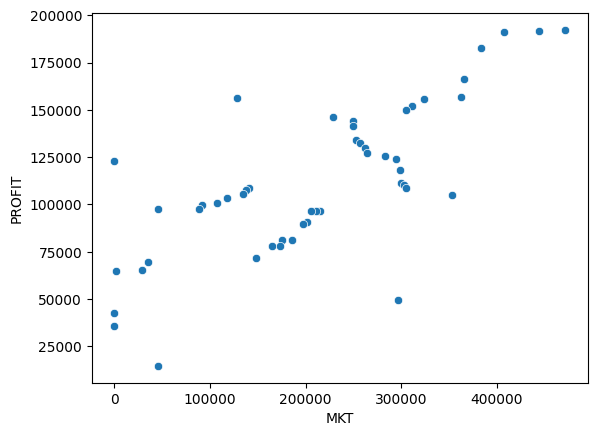

In [107]:
import seaborn as sns
sns.scatterplot(data=d,x='MKT',y='PROFIT')

In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [109]:
model.intercept_

array([60003.54881577])

In [110]:
model.coef_

array([[0.24645926]])

<Axes: xlabel='MKT', ylabel='PROFIT'>

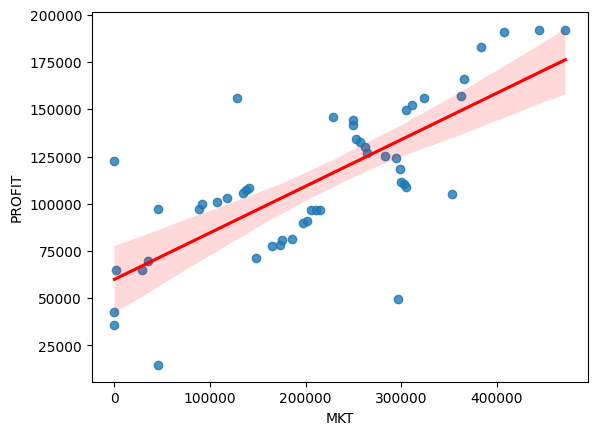

In [111]:
sns.regplot(data=d,x='MKT',y='PROFIT',line_kws={'color':'red'})

In [112]:
mkt = [[80000]]
model_pre = model.predict(mkt)

In [113]:
model_pre

array([[79720.28997175]])

In [114]:
ypred = model.predict(X)

In [117]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(Y,ypred)
mse

701870011.1971463

In [119]:
rmse = mse**(1/2)
rmse

26492.82942981263

In [121]:
mae = mean_absolute_error(Y,ypred)
mae

21145.71752315582

In [125]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y,ypred)
mape

0.28621259879740946

In [127]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,ypred)
r2

0.5591535746115515

In [132]:
e = pd.read_csv('50_Startups.csv')
e.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [133]:
X = d[['RND','MKT','ADMIN']]
Y = d[['PROFIT']]

In [134]:
X.head()

,RND,MKT,ADMIN
0,165349.20,471784.10,136897.80
1,162597.70,443898.53,151377.59
2,153441.51,407934.54,101145.55
3,144372.41,383199.62,118671.85
4,142107.34,366168.42,91391.77


In [135]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [136]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [137]:
model.intercept_


array([50122.19298987])

In [138]:
model.coef_

array([[ 0.80571505,  0.02722806, -0.02681597]])

In [140]:
coef = pd.Series(model.coef_.flatten())
coef.index = X.columns
coef

RND      0.805715
MKT      0.027228
ADMIN   -0.026816
dtype: float64

<Axes: title={'center': 'counting linear regression'}>

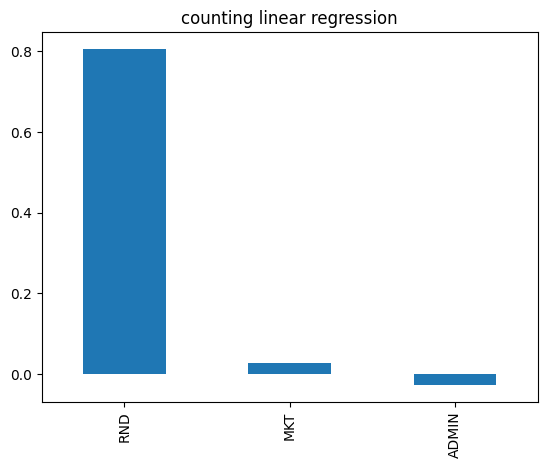

In [141]:
coef.plot(kind='bar',title='counting linear regression')

In [142]:
xnew = [[100000,50000,30000]]
xnew_pre = model.predict(xnew)
xnew_pre

array([[131250.62216964]])

In [144]:
y_pred = model.predict(X)

In [145]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

In [148]:
mse = mean_squared_error(Y,y_pred)
mse

78417126.01913083

In [149]:
rmse = mse**(1/2)
rmse

8855.34448901514

In [151]:
mae = mean_absolute_error(Y,y_pred)
mae

6471.45039610481

In [152]:
mape = mean_absolute_percentage_error(Y,y_pred)
mape

0.10601209160494125

In [153]:
r2 = r2_score(Y,y_pred)

In [154]:
r2

0.9507459940683246